In [1]:
# Goal: Estimate sensitivity of tigerfit results to changes to cut-off time
import sys
import numpy as np
import logging
import warnings
import tqdm
import tqdm.contrib
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')

import matplotlib.pyplot as plt
import seaborn
import astropy.table as table
import astropy.units as u

import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.tigerfit as tigerfit
import snelib19odp.utils as utils

model = np.vectorize(tigerfit.Lum_rad)

In [2]:
# load datasets
ds19odp = dataset.load_dataset('SN2019odp_phot')
ds13bvn = dataset.load_dataset('iPTF13bvn')
ds08d = dataset.load_dataset('SN2008D')
ds98bw = dataset.load_dataset('SN1998bw')

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
../lib/snelib19odp/tigerfit.py:64: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \


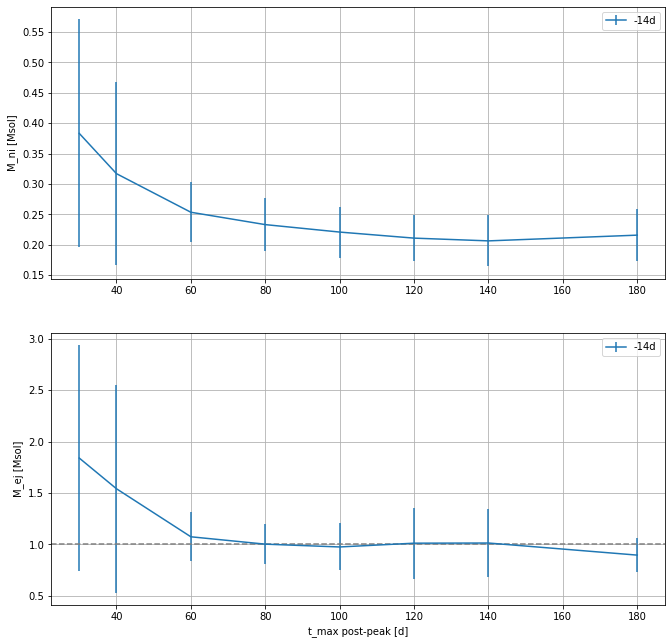

In [3]:
fig, axs = plt.subplots(nrows=2, figsize=(11,11))
axs[0].set_ylabel('M_ni [Msol]')
axs[1].set_ylabel('M_ej [Msol]')
axs[1].set_xlabel('t_max post-peak [d]')
params19odp = {
    #'texpl': ('samples', np.linspace(ds19odp.first_detection_mjd-4, ds19odp.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.linspace(58712.48, 58716.38, 300)),
    'vej': ('uniform', 11e3, 12e3)
}
max_ts = np.array([30.0, 40, 60, 80, 100, 120, 140, 180])
#max_ts = np.array([30.0, 180])

mni_mean = np.empty_like(max_ts)
mni_std = np.empty_like(max_ts)
mej_mean = np.empty_like(max_ts)
mej_std = np.empty_like(max_ts)
td_mean = np.empty_like(max_ts)
td_std = np.empty_like(max_ts)

for i,max_t in tqdm.contrib.tenumerate(max_ts):
    #print(max_t)
    #time_range = (-14, max_t)
    #time_range = (-17, max_t)
    time_range = (-14, max_t)
    fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak', quiet=True)
    mni_mean[i] = np.nanmean(fit19odp['mni'])
    mni_std[i] = np.nanstd(fit19odp['mni'])
    mej_mean[i] = np.nanmean(fit19odp['mejecta'])
    mej_std[i] = np.nanstd(fit19odp['mejecta'])
    td_mean[i] = np.nanmean(fit19odp['td'])
    td_std[i] = np.nanstd(fit19odp['td'])
axs[0].errorbar(max_ts, mni_mean, yerr=mni_std, label='-14d')
axs[1].errorbar(max_ts, mej_mean, yerr=mej_std, label='-14d')
axs[1].axhline(1, ls='--', color='grey')

for i,max_t in tqdm.contrib.tenumerate(max_ts):
    break
    #print(max_t)
    #time_range = (-14, max_t)
    #time_range = (-17, max_t)
    time_range = (-16, max_t)
    fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak', quiet=True)
    mni_mean[i] = np.nanmean(fit19odp['mni'])
    mni_std[i] = np.nanstd(fit19odp['mni'])
    mej_mean[i] = np.nanmean(fit19odp['mejecta'])
    mej_std[i] = np.nanstd(fit19odp['mejecta'])
#axs[0].errorbar(max_ts, mni_mean, yerr=mni_std, label='-16d')
#axs[1].errorbar(max_ts, mej_mean, yerr=mej_std, label='-16d')

for i,max_t in tqdm.contrib.tenumerate(max_ts):
    break
    #print(max_t)
    #time_range = (-14, max_t)
    #time_range = (-17, max_t)
    time_range = (-12, max_t)
    fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak', quiet=True)
    mni_mean[i] = np.nanmean(fit19odp['mni'])
    mni_std[i] = np.nanstd(fit19odp['mni'])
    mej_mean[i] = np.nanmean(fit19odp['mejecta'])
    mej_std[i] = np.nanstd(fit19odp['mejecta'])
#axs[0].errorbar(max_ts, mni_mean, yerr=mni_std, label='-12d')
#axs[1].errorbar(max_ts, mej_mean, yerr=mej_std, label='-12d')

for i,max_t in tqdm.contrib.tenumerate(max_ts):
    break
    #print(max_t)
    #time_range = (-14, max_t)
    #time_range = (-17, max_t)
    time_range = (-9, max_t)
    fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak', quiet=True)
    mni_mean[i] = np.nanmean(fit19odp['mni'])
    mni_std[i] = np.nanstd(fit19odp['mni'])
    mej_mean[i] = np.nanmean(fit19odp['mejecta'])
    mej_std[i] = np.nanstd(fit19odp['mejecta'])
#axs[0].errorbar(max_ts, mni_mean, yerr=mni_std, label='-9d')
#axs[1].errorbar(max_ts, mej_mean, yerr=mej_std, label='-9d')

axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()
#fig.savefig('2022-02-07-tigerfit-sens-2019odp.png')

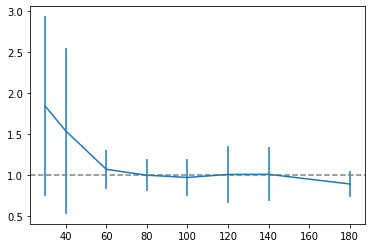

In [4]:
plt.errorbar(max_ts, mej_mean, yerr=mej_std)
plt.axhline(1, ls='--', color='grey')

array([7.49855937, 6.61863299, 2.46575694, 1.96819695, 2.07702784,
       3.18598514, 2.9244608 , 1.68359137])

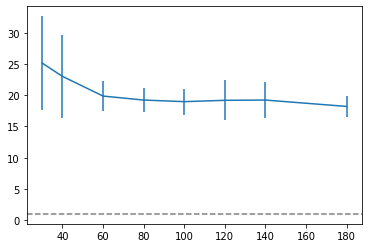

In [6]:
plt.errorbar(max_ts, td_mean, yerr=td_std)
plt.axhline(1, ls='--', color='grey')
td_std

In [5]:
mni_mean

array([0.26559583, 0.25610771, 0.2492608 , 0.23680194, 0.21296527,
       0.19699479, 0.2028091 , 0.21633536])

In [6]:
max_ts

array([ 30.,  40.,  60.,  80., 100., 120., 140., 180.])

In [7]:
params13bvn = {
    #'texpl': ('samples', np.linspace(ds13bvn.first_detection_mjd-4, ds13bvn.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300)),
    'vej': ('uniform', 6000, 9000)
}
time_range = (0, 60)
fit13bvn, results = tigerfit.sample(ds13bvn, params13bvn, return_results=True, time_range=time_range)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
100%|██████████| 300/300 [00:26<00:00, 11.37it/s]


(array([23., 48., 79., 57., 33., 36., 13.,  6.,  2.,  3.]),
 array([0.03551416, 0.04921365, 0.06291314, 0.07661264, 0.09031213,
        0.10401162, 0.11771111, 0.1314106 , 0.14511009, 0.15880958,
        0.17250907]),
 <BarContainer object of 10 artists>)

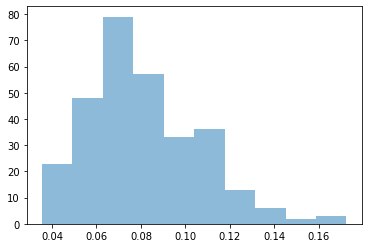

In [8]:
plt.hist(fit13bvn['mni'], label='iPTF13bvn', alpha=0.5)

In [9]:
params19odp = {
    #'texpl': ('samples', np.linspace(ds19odp.first_detection_mjd-4, ds19odp.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.linspace(58712.48, 58716.38, 300)),
    'vej': ('uniform', 11e3, 12e3)
}
time_range = (-13, 160)
fit19odp, results = tigerfit.sample(ds19odp, params19odp, return_results=True, time_range=time_range, time_format='peak')

  1%|          | 2/300 [00:00<00:59,  5.05it/s]../lib/snelib19odp/tigerfit.py:60: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \
100%|██████████| 300/300 [01:06<00:00,  4.50it/s]


(array([22., 45., 55., 67., 44., 43., 19.,  4.,  0.,  1.]),
 array([0.1262961 , 0.14939519, 0.17249427, 0.19559336, 0.21869244,
        0.24179153, 0.26489061, 0.2879897 , 0.31108878, 0.33418787,
        0.35728695]),
 <BarContainer object of 10 artists>)

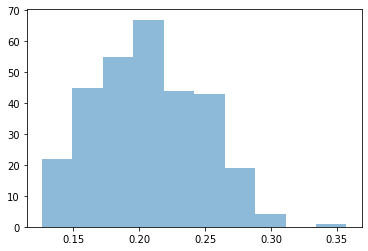

In [10]:
plt.hist(fit19odp['mni'], label='SN2019odp', alpha=0.5)

In [11]:
def plot_results(ds, r, time_range, prior_texpl=58714.5):
    plt.figure(figsize=(11,8))
    t_grid = np.linspace(prior_texpl+time_range[0], prior_texpl+time_range[1], 100)
    
    for i in range(10):
        lc = ds.sample_abs_lc(method='lyman', t_grid=t_grid)
        lums = utils.convert_luminosity(lc)
        plt.plot(t_grid - ds.transient.prior_t0, lums, label='Observed', color='tab:purple', alpha=0.3)
    for i in np.random.randint(0, 300, size=20):
        t = np.linspace(1e-3, time_range[1], 100)
        lc = model(t, *r[i].params)
        plt.plot(t+r[i].texpl-ds.transient.prior_t0, np.exp(lc), color='tab:orange', alpha=0.1)
        
        
def plot_residuals(r):
    for i in np.random.randint(0, 300, size=90):
        plt.plot(r[i].t, np.exp(r[i].residual), color='tab:orange', alpha=0.1)

../lib/snelib19odp/utils.py:25: RuntimeWarning: overflow encountered in power
  luminosity = (const.L_sun.cgs.value)*10 ** ((4.74 - abs_mag)/2.5)
../lib/snelib19odp/utils.py:25: RuntimeWarning: overflow encountered in power
  luminosity = (const.L_sun.cgs.value)*10 ** ((4.74 - abs_mag)/2.5)
../lib/snelib19odp/utils.py:25: RuntimeWarning: overflow encountered in power
  luminosity = (const.L_sun.cgs.value)*10 ** ((4.74 - abs_mag)/2.5)


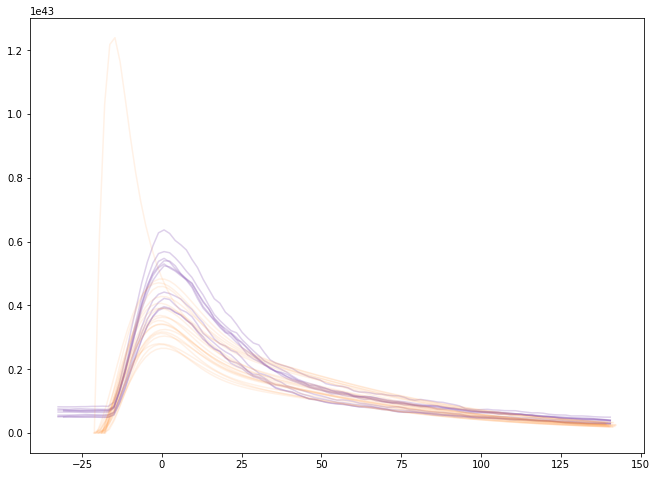

In [12]:
plot_results(ds19odp, results, time_range=time_range)

In [13]:
ds19odp.first_detection_mjd

58635.4008681

  1%|          | 2/300 [00:00<00:28, 10.54it/s]

30.0


  1%|          | 2/300 [00:00<00:21, 13.73it/s]

50.0


  1%|          | 2/300 [00:00<00:23, 12.45it/s]

70.0


  1%|          | 2/300 [00:00<00:27, 10.87it/s]

100.0


  1%|          | 2/300 [00:00<00:29, 10.14it/s]

150.0


  0%|          | 1/300 [00:00<00:37,  7.97it/s]

180.0


100%|██████████| 300/300 [00:25<00:00, 11.55it/s]


<ErrorbarContainer object of 3 artists>

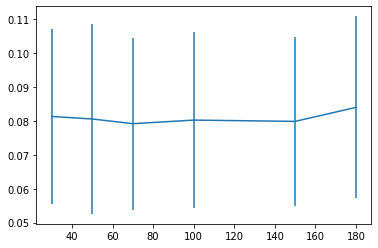

In [14]:
params13bvn = {
    #'texpl': ('samples', np.linspace(ds13bvn.first_detection_mjd-4, ds13bvn.first_detection_mjd-1, 300)),
    'texpl': ('samples', np.random.uniform(56458-1, 56459, size=300)),
    'vej': ('uniform', 6000, 9000)
}

#max_ts = np.array([30.0, 40, 60, 80, 100, 120, 140, 180])
max_ts = np.array([30.0, 50, 70, 100, 150, 180])

mni_mean = np.empty_like(max_ts)
mni_std = np.empty_like(max_ts)
mej_mean = np.empty_like(max_ts)
mej_std = np.empty_like(max_ts)

for i,max_t in enumerate(max_ts):
    print(max_t)
    #time_range = (-14, max_t)
    #time_range = (-17, max_t)
    time_range = (0, 60)
    fit13bvn, results = tigerfit.sample(ds13bvn, params13bvn, return_results=True, time_range=time_range)
    mni_mean[i] = np.nanmean(fit13bvn['mni'])
    mni_std[i] = np.nanstd(fit13bvn['mni'])
    mej_mean[i] = np.nanmean(fit13bvn['mejecta'])
    mej_std[i] = np.nanstd(fit13bvn['mejecta'])
plt.errorbar(max_ts, mni_mean, yerr=mni_std)

<ErrorbarContainer object of 3 artists>

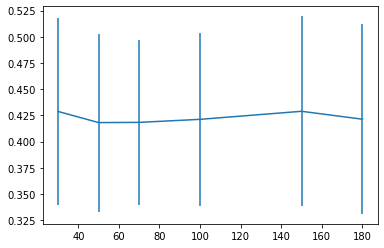

In [15]:
plt.errorbar(max_ts, mej_mean, yerr=mej_std)